In [19]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Connecting to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="homework4",
    user="postgres",
    password="212121"
)

In [23]:
#Loading countries and cities data into DataFrames
countries_df = pd.read_sql("SELECT * FROM countries", conn)
cities_df = pd.read_sql("SELECT * FROM cities", conn)

#Closing the connection as data is loaded
conn.close()

C:\Users\ryash\AppData\Local\Temp\ipykernel_7036\2632995442.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  countries_df = pd.read_sql("SELECT * FROM countries", conn)
C:\Users\ryash\AppData\Local\Temp\ipykernel_7036\2632995442.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cities_df = pd.read_sql("SELECT * FROM cities", conn)


In [25]:
print(countries_df.head())
print(cities_df.head())

   fact_id country_code country_name country_region  country_sub_region  \
0        1           af  Afghanistan           Asia       Southern Asia   
1        2           al      Albania         Europe     Southern Europe   
2        3           ag      Algeria         Africa     Northern Africa   
3        4           an      Andorra         Europe     Southern Europe   
4        5           ao       Angola         Africa  Sub-Saharan Africa   

   country_area  country_area_land  country_area_water  country_population  \
0      652230.0           652230.0                 0.0            32564342   
1       28748.0            27398.0              1350.0             3029278   
2     2381741.0          2381741.0                 0.0            39542166   
3         468.0              468.0                 0.0               85580   
4     1246700.0          1246700.0                 0.0            19625353   

   country_population_growth  country_birth_rate  country_death_rate  \
0       

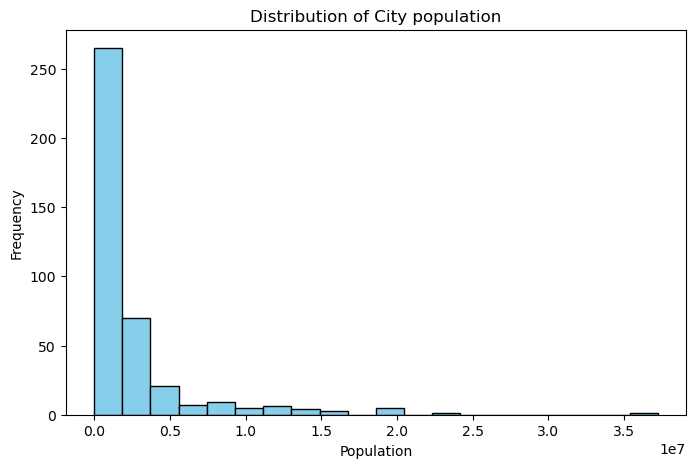

In [91]:
plt.figure(figsize=(8, 5))
plt.hist(cities_df['city_population'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of City population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

#### The distribution is right-skewed, indicating that most cities have relatively small populations, while a few have significantly larger ones. The majority of the data is concentrated on the lower end of the population scale, with fewer cities reaching extremely high population counts. The tallest bars appear on the left side of the histogram, reflecting a large number of cities with smaller populations. There are likely some outliers or exceptionally large cities on the right side of the graph, where population counts are very high, but only a few cities fall into this category. The population values span a wide range, from smaller towns to large metropolitan areas, demonstrating high variability in city sizes.

          country_name  avg_city_population  country_population
0          Afghanistan            3097000.0            32564342
1              Albania             419000.0             3029278
2              Algeria            1849500.0            39542166
3       American Samoa              64000.0               54343
4              Andorra              23000.0               85580
..                 ...                  ...                 ...
205  Wallis and Futuna               1000.0               15613
206     Western Sahara             237000.0              570866
207              Yemen            1601500.0            26737317
208             Zambia            1802000.0            15066266
209           Zimbabwe            1542000.0            14229541

[210 rows x 3 columns]


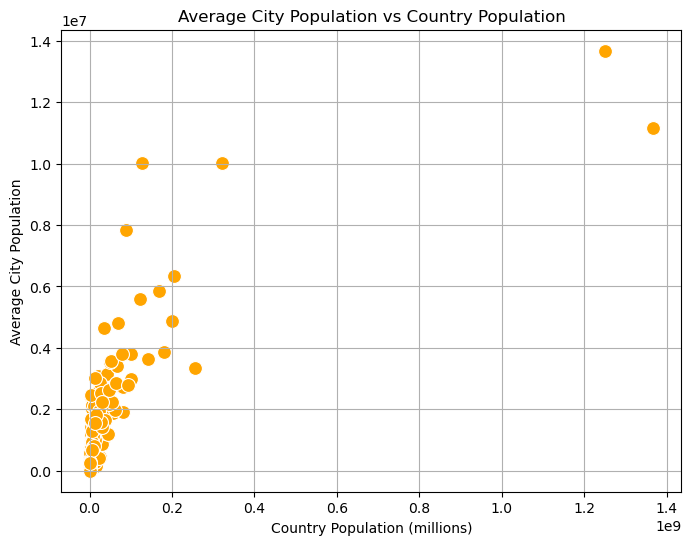

In [95]:
avg_city_population_df = df_merged.groupby('country_name').agg(
    avg_city_population=('city_population', 'mean'),
    country_population=('country_population', 'first')
).reset_index()

print(avg_city_population_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='country_population', y='avg_city_population', data=avg_city_population_df, s=100, color='orange')
plt.title('Average City Population vs Country Population')
plt.xlabel('Country Population (millions)')
plt.ylabel('Average City Population')
plt.grid(True)
plt.show()

#### Most countries have smaller populations (less than 300 million), with corresponding smaller average city populations. This suggests a pattern where numerous countries maintain a relatively balanced distribution of population across cities. The two points on the far right represent countries with very large populations which are CHina and India. These outliers show significant deviation, with substantial average city populations. This suggests highly urbanized areas or megacities within these nations. The data indicates a trend where countries with larger populations tend to have larger average city populations, highlighting a potential urbanization effect where more populous countries concentrate people in large urban centers.

<Axes: title={'center': 'Country Birth Rate v/s Population growth'}, xlabel='country_birth_rate', ylabel='country_population_growth'>

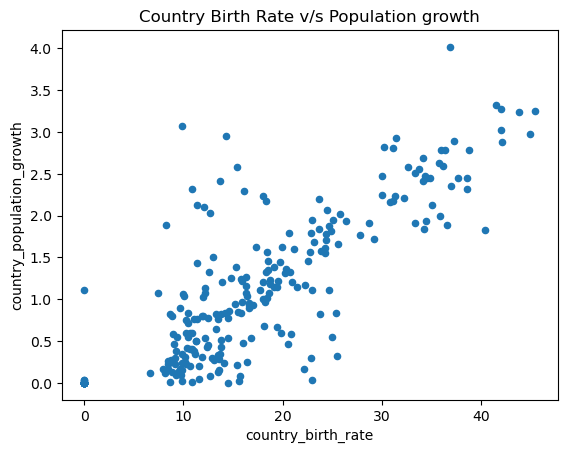

In [116]:
countries_df.plot.scatter(x='country_birth_rate', y='country_population_growth', title='Country Birth Rate v/s Population growth')

#### There's a positive correlation between birth rate and population growth. As birth rates rise, so does population growth, assuming stable death rates and migration. Countries with birth rates under 20 per 1,000 generally see population growth between 0% and 2%, indicating that factors like migration or lower death rates drive growth here. Countries with birth rates over 20 per 1,000 typically experience growth above 1%, sometimes exceeding 3.5%. Large-population countries like China or India can sustain growth through urbanization and resource management despite being outliers.

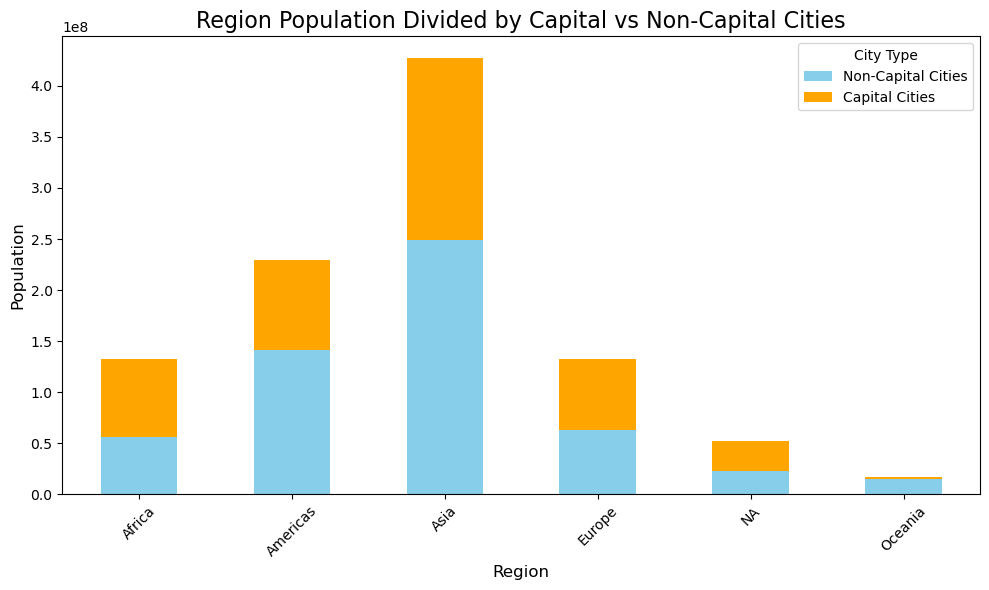

In [128]:
region_population = df_merged.groupby(['country_region', 'capital'])['city_population'].sum().unstack(fill_value=0)
region_population.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))

plt.title('Region Population Divided by Capital vs Non-Capital Cities', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population', fontsize=12)

plt.legend(['Non-Capital Cities', 'Capital Cities'], title='City Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Asia shows a significant population concentrated in both capital and non-capital cities, indicating extensive urbanization and large city populations. Non-capital cities in Asia contribute to a large portion of this population. Americas and Europe regions show a relatively even distribution between capital and non-capital city populations. Africa displays a substantial population in capital cities, highlighting possible urban concentration in capitals. This could indicate growing urbanization challenges and opportunities in capital regions. Oceania and North America regions have relatively smaller populations in both capital and non-capital cities, reflecting either smaller populations or perhaps fewer large cities.